In [1]:
import pandas as pd
import re

# Regex pattern for parsing log entries
log_pattern = re.compile(
    r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s+-\s+(?P<country>[A-Z]+)\s+-\s+\[(?P<timestamp>[^\]]+)\]\s+'
    r'"(?P<method>GET|POST|PUT|DELETE|PATCH|OPTIONS|HEAD)\s+(?P<path>[^"]+)\s+HTTP/[^"]+"\s+'
    r'(?P<status>\d+)\s+\d+\s+"[^"]*"\s+"(?P<user_agent>[^"]+)"\s+(?P<response_time>\d+)'
)

def parse_log_file(file_path):
    records = []

    with open(file_path, 'r') as f:
        for line in f:
            match = log_pattern.search(line)
            if match:
                records.append(match.groupdict())

    # Convert to DataFrame
    df = pd.DataFrame(records)

    # Optional: Convert types
    df['status'] = df['status'].astype(int)
    df['response_time'] = df['response_time'].astype(int)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y:%H:%M:%S')

    return df

file_path = "sample-log.log"
df = parse_log_file(file_path)
print(df.head())


               ip country           timestamp method  \
0   100.34.17.233      NO 2025-07-01 06:00:02    GET   
1   173.80.18.254      NO 2025-07-01 06:00:04   POST   
2       10.3.0.48      SE 2025-07-01 06:00:06    GET   
3   172.56.143.33      US 2025-07-01 06:00:08    GET   
4  208.54.157.184      NO 2025-07-01 06:00:09   POST   

                            path  status  \
0  /news/grammy-nominations-2024     302   
1                              /     200   
2      /podcasts/behind-the-beat     200   
3              /terms-of-service     200   
4                /privacy-policy     200   

                                          user_agent  response_time  
0  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...            269  
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...            124  
2  Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...            284  
3  Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...            262  
4  Mozilla/5.0 (Windows NT 10.0; Win64; x64) App

In [11]:
error_logs = df[df['status'].between(500, 599)]
print(error_logs.head())

                 ip country           timestamp method  \
70   140.82.111.146      SE 2025-07-01 06:02:10    GET   
165    172.18.3.199      SE 2025-07-01 06:05:36    GET   
180   174.49.228.71      NO 2025-07-01 06:06:09    GET   
379  157.241.239.46      SE 2025-07-01 06:12:38    GET   
406  173.79.206.235      CA 2025-07-01 06:13:21    GET   

                                  path  status  \
70     /artists/emerging-indie-artists     500   
165     /genres/electronic-music-guide     500   
180                  /static/js/app.js     500   
379  /articles/indie-rock-revival-2024     500   
406                 /images/banner.jpg     500   

                                            user_agent  response_time  
70   Mozilla/5.0 (Android 14; Mobile; rv:121.0) Gec...             64  
165  Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...            247  
180  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...             43  
379  Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...        

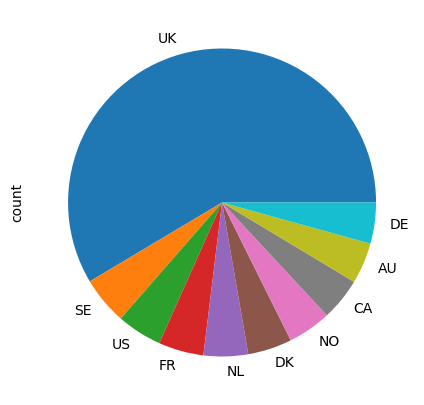

In [21]:
country_count = error_logs['country'].value_counts()

plot = country_count.plot.pie(y='country', figsize=(5, 5))

In [23]:
error_ip_count = error_logs['ip'].value_counts()
error_ip_count

ip
194.168.1.2        577
194.168.1.1        565
194.168.1.6        560
194.168.1.4        557
194.168.1.3        552
                  ... 
192.168.41.74        1
151.102.43.71        1
198.228.235.199      1
208.54.66.73         1
157.242.99.25        1
Name: count, Length: 3601, dtype: int64

In [27]:
error_logs['user_agent'].value_counts()

user_agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                              2013
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Version/17.2.1 Safari/537.36                          1468
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                         921
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 Edg/120.0.0.0                 915
Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.2 Mobile/15E148 Safari/604.1     904
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:121.0) Gecko/20100101 Firefox/121.0                                                              397
Mozilla/5.0 (iPad; CPU OS 17_2_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.2 Mobile/15E1

In [28]:
df['ip'].value_counts()

ip
45.133.1.2        5400
45.133.1.1        5400
35.185.0.156      3600
194.168.1.2       1859
194.168.1.6       1855
                  ... 
99.204.196.41        1
174.51.109.172       1
73.222.207.224       1
10.13.0.29           1
107.78.108.164       1
Name: count, Length: 40887, dtype: int64

In [39]:
russian_bot = df[df['ip'] == '45.133.1.1']
print(russian_bot)
print(russian_bot['user_agent'].value_counts())

                ip country           timestamp   method  \
151435  45.133.1.1      RU 2025-07-02 15:00:00  OPTIONS   
151436  45.133.1.1      RU 2025-07-02 15:00:00  OPTIONS   
151437  45.133.1.1      RU 2025-07-02 15:00:00  OPTIONS   
151448  45.133.1.1      RU 2025-07-02 15:00:02      PUT   
151449  45.133.1.1      RU 2025-07-02 15:00:02      GET   
...            ...     ...                 ...      ...   
174782  45.133.1.1      RU 2025-07-02 15:59:56     POST   
174783  45.133.1.1      RU 2025-07-02 15:59:56     HEAD   
174795  45.133.1.1      RU 2025-07-02 15:59:58    PATCH   
174796  45.133.1.1      RU 2025-07-02 15:59:58      PUT   
174797  45.133.1.1      RU 2025-07-02 15:59:58      GET   

                               path  status  \
151435                /api/v1/users     200   
151436            /api/v2/users/../     404   
151437         /api/v3/users/../../     404   
151448    /api/v2/users/profile/dev     404   
151449  /api/v3/users/profile/debug     404   
...      

In [77]:
bot_keywords = [
    'bot', 'spider', 'crawler', 'curl', 'wget', 'scrapy', 'httpclient',
    'python', 'ruby', 'java', 'go-http', 'aiohttp', 'libwww', 'node-fetch',
    'phantomjs', 'selenium', 'headless', 'slurp', 'feedfetcher', 'http-request',
    'scan', 'nutch', 'httpx', 'axios'
]

pattern = '|'.join(bot_keywords)
bots = df[df['user_agent'].str.contains(pattern, case=False, na=False)]


<Axes: ylabel='count'>

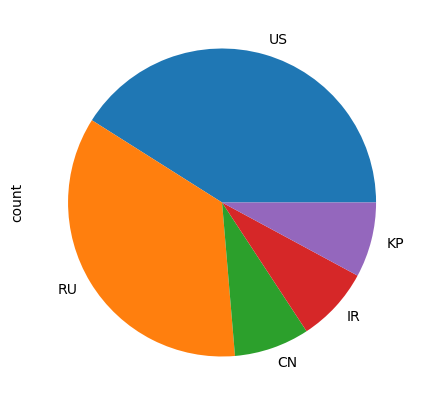

In [80]:
bots['country'].value_counts().plot.pie(y='country', figsize=(5, 5))

In [73]:
prev_logs = 60
df.iloc[int(error_logs.iloc[0][7])-prev_logs:int(error_logs.iloc[0][7])] # looks at the records before the server error (this gets me nowhere)

/tmp/ipykernel_92692/783660280.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[int(error_logs.iloc[0][7])-prev_logs:int(error_logs.iloc[0][7])] # looks at the records before the server error (this gets me nowhere)


,ip,country,timestamp,method,path,status,user_agent,response_time
4,208.54.157.184,NO,2025-07-01 06:00:09,POST,/privacy-policy,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118
5,96.114.162.7,SE,2025-07-01 06:00:15,GET,/images/banner.jpg,200,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,374
6,107.78.231.35,FR,2025-07-01 06:00:16,GET,/subscribe-premium,200,Mozilla/5.0 (Linux; Android 14; SM-G998B) Appl...,262
7,174.54.112.5,DK,2025-07-01 06:00:17,GET,/podcasts/music-producer-interviews,200,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,164
8,192.168.3.81,FR,2025-07-01 06:00:19,POST,/api/episodes,404,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,606
9,99.224.121.154,US,2025-07-01 06:00:22,GET,/privacy-policy,200,Mozilla/5.0 (Linux; Android 14; SM-G998B) Appl...,248
10,172.21.0.92,DE,2025-07-01 06:00:23,GET,/api/episodes,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,364
11,100.34.131.87,DK,2025-07-01 06:00:25,GET,/contact,200,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,204
12,68.1.252.104,SE,2025-07-01 06:00:27,POST,/api/v1/auth/login?username=bob%40company.com,200,Mozilla/5.0 (Linux; Android 14; SM-G998B) Appl...,523
13,174.50.109.73,DK,2025-07-01 06:00:28,GET,/reviews/album-review-midnight-echoes,200,Mozilla/5.0 (iPad; CPU OS 17_2_1 like Mac OS X...,347


,ip,country,timestamp,method,path,status,user_agent,response_time,ip_count
99202,35.185.0.156,US,2025-07-02 05:00:00,GET,/search?year=2024,200,Wget/1.20.3 (linux-gnu),353,3600
99203,35.185.0.156,US,2025-07-02 05:00:00,GET,/search,200,Wget/1.20.3 (linux-gnu),477,3600
99204,35.185.0.156,US,2025-07-02 05:00:01,GET,/search,200,Wget/1.20.3 (linux-gnu),264,3600
99205,35.185.0.156,US,2025-07-02 05:00:01,GET,/search?genre=ambient+soundscapes&s=The+1975&y...,200,Wget/1.20.3 (linux-gnu),446,3600
99206,35.185.0.156,US,2025-07-02 05:00:02,GET,/search?s=Fontaines+D.C.&s=Arctic+Monkeys&dura...,200,Wget/1.20.3 (linux-gnu),477,3600
...,...,...,...,...,...,...,...,...,...
428531,185.220.101.86,CN,2025-07-04 20:59:55,POST,/api/login?username=jennifer&password=password...,429,Apache-HttpClient/4.5.13,115,1440
428533,185.220.102.135,RU,2025-07-04 20:59:56,POST,/admin/login?username=jennifer&password=admin%...,401,PostmanRuntime/7.32.3,241,1440
428535,185.220.101.19,IR,2025-07-04 20:59:57,POST,/api/admin/login?username=jennifer&password=12...,401,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118,1440
428537,185.220.101.78,CN,2025-07-04 20:59:58,POST,/auth/signin?username=jennifer&password=87654321,401,HTTPie/3.2.0,268,1440


In [86]:
len(bots)/len(df) * 100

2.0305672813448865